# Heart

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
df = pd.read_csv("Heart.csv")
df.head(100)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
print(X[:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]


In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2,random_state=0)


In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train , y_train)


SVC(kernel='linear')

In [9]:
y_hat = clf.predict(X_test)
print(y_test)
print(y_hat)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix, without normalization
[[20  7]
 [ 4 30]]


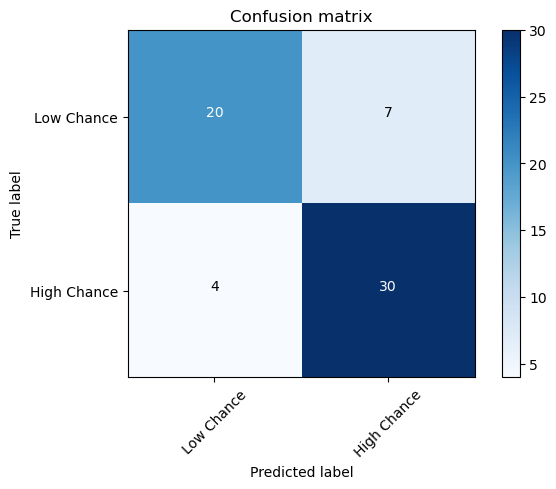

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low Chance','High Chance'],normalize= False,  title='Confusion matrix')